80 0.4513505536546347 0.21041379255410675
a) Ground speed for bomb to strike target is ~80 m/s or ~179 mph
75 -96.05748189165075 0.12142654522617136
77 -57.25308267802539 -0.20637437606220033
80 0.4513505536546347 0.21041379255410675
82 38.41915190018047 -0.12306234545184225
84 76.05918430456481 -0.46122942169319003
85 94.88688627726104 0.2787118718063937
c) Range of acceptable speeds for +/-100m from target to be ~ +/-5 m/s (75 m/s to 85 m/s)
or in imperial units +/- ~11 mph (168 mph to 190 mph)
b)


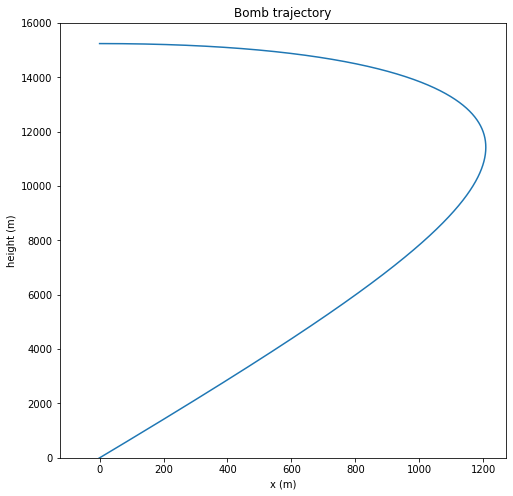

In [105]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

h= 15240 #height
A= np.pi*0.2**2 #effective area of bomb for drag calc
Cd=0.47 #drag coefficient
p= 1 #air density
m=100 #mass in kg
g=9.81 #gravity
vw=26.82 #wind speed

#a)
for vi in np.arange(20,200): #range of plane speed/initial bomb velocities to try
    
    y0= [0,vi,h,0]

    # the function defining the right-hand sides of the ODEs
    def dy_dt(y, t, Cd, p, A, m, g,h):
        x1, x2, y1, y2 = y
        vmag=np.sqrt((x2+vw)**2+y2**2)
        dydt = [x2, -0.5*Cd*p*A*(x2+vw)*vmag/m, y2, -g-0.5*Cd*p*A*y2*vmag/m]
        return dydt

    t=np.arange(0,100,0.01)
    sol = odeint(dy_dt, y0, t, args=(Cd, p, A, m, g, h))
    xpos= sol[:,0]
    vx= sol[:,1]
    ypos= sol[:,2]
    vy=sol[:,3]
    for i in np.arange(0,len(xpos)):
        if -0.5<xpos[i]<0.5:
            if -0.5<ypos[i]<0.5:
                print(vi,xpos[i],ypos[i])
                
#So we find the necessary ground speed is ~80 m/s
print('a) Ground speed for bomb to strike target is ~80 m/s or ~179 mph')

#b)
vi=80
y0= [0,vi,h,0]

# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, Cd, p, A, m, g,h):
    x1, x2, y1, y2 = y
    vmag=np.sqrt((x2+vw)**2+y2**2)
    dydt = [x2, -0.5*Cd*p*A*(x2+vw)*vmag/m, y2, -g-0.5*Cd*p*A*y2*vmag/m]
    return dydt

t=np.arange(0,100,0.01)
sol = odeint(dy_dt, y0, t, args=(Cd, p, A, m, g, h))
xpos= sol[:,0]
vx= sol[:,1]
ypos= sol[:,2]
vy=sol[:,3]
figure(1,figsize=(8,8))
plt.plot(xpos,ypos)
plt.ylim(0,16000)
plt.xlabel('x (m)')
plt.ylabel('height (m)')
plt.title('Bomb trajectory')

#c)
for vi in np.arange(50,110): #range of plane speed/initial bomb velocities to try
    
    y0= [0,vi,h,0]

    # the function defining the right-hand sides of the ODEs
    def dy_dt(y, t, Cd, p, A, m, g,h):
        x1, x2, y1, y2 = y
        vmag=np.sqrt((x2+vw)**2+y2**2)
        dydt = [x2, -0.5*Cd*p*A*(x2+vw)*vmag/m, y2, -g-0.5*Cd*p*A*y2*vmag/m]
        return dydt

    t=np.arange(0,100,0.01)
    sol = odeint(dy_dt, y0, t, args=(Cd, p, A, m, g, h))
    xpos= sol[:,0]
    vx= sol[:,1]
    ypos= sol[:,2]
    vy=sol[:,3]
    for i in np.arange(0,len(xpos)):
        if -100<xpos[i]<100:
            if -0.5<ypos[i]<0.5:
                print(vi,xpos[i],ypos[i])
                
#So we find the range of acceptable speeds for +/-100m from target to be about 5 m/s
print('c) Range of acceptable speeds for +/-100m from target to be ~ +/-5 m/s (75 m/s to 85 m/s)')
print('or in imperial units +/- ~11 mph (168 mph to 190 mph)')
print('b)')